Loading data from vectorized_species_master.csv...
 31 features for 520 plants...
PC1 (Dominant Signal): 8.05% of variance
PC2 (Secondary Signal): 5.91% of variance
Top 2 Components Total: 13.97%
Components required to capture 90% of data info: 24

Feature Loadings saved to: pca_feature_loadings.csv

 Top Drivers of PC1 (Most Variance) 
light_Unknown      0.561890
habit_Unknown      0.556824
habit_Forb/herb    0.417757
light_8.0          0.258754
light_7.0          0.212329
Name: PC1, dtype: float64

 Top Drivers of PC2 
growth_ph_minimum        0.612266
growth_ph_maximum        0.580923
habit_Forb/herb          0.214547
habit_Shrub, Subshrub    0.200400
light_5.0                0.195690
Name: PC2, dtype: float64

Visualization saved to: pca_cluster_plot.png
Analysis Complete.


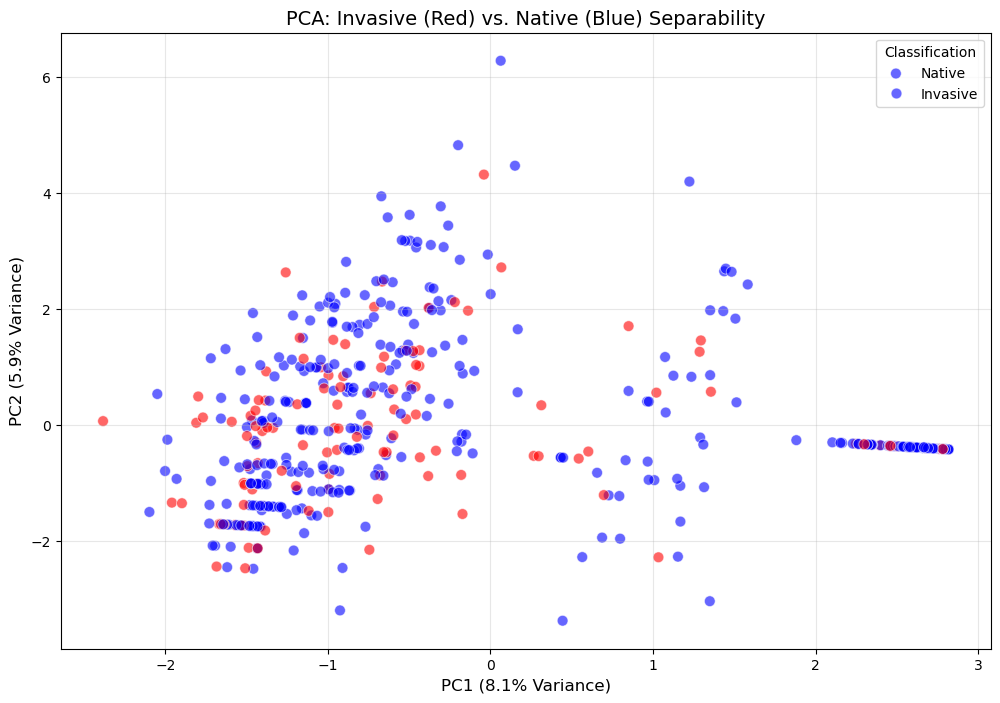

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

INPUT_FILE = 'vectorized_species_master.csv'
PLOT_FILE = 'pca_cluster_plot.png'
LOADINGS_FILE = 'pca_feature_loadings.csv'

def run_pca_analysis():
    print(f"Loading data from {INPUT_FILE}...")
    df = pd.read_csv(INPUT_FILE)

    meta_cols = ['scientific_name', 'is_invasive']
    feature_cols = [c for c in df.columns if c not in meta_cols]
    
    X = df[feature_cols]
    y = df['is_invasive']
    
    print(f" {len(feature_cols)} features for {len(df)} plants...")

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    explained_var = pca.explained_variance_ratio_
    cum_var = np.cumsum(explained_var)
    
    print(f"PC1 (Dominant Signal): {explained_var[0]:.2%} of variance")
    print(f"PC2 (Secondary Signal): {explained_var[1]:.2%} of variance")
    print(f"Top 2 Components Total: {cum_var[1]:.2%}")
    
    n_90 = np.argmax(cum_var >= 0.90) + 1
    print(f"Components required to capture 90% of data info: {n_90}")

    loadings = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(len(feature_cols))],
        index=feature_cols
    )
    
    loadings.to_csv(LOADINGS_FILE)
    print(f"\nFeature Loadings saved to: {LOADINGS_FILE}")
    
    print("\n Top Drivers of PC1 (Most Variance) ")
    print(loadings['PC1'].abs().sort_values(ascending=False).head(5))
    
    print("\n Top Drivers of PC2 ")
    print(loadings['PC2'].abs().sort_values(ascending=False).head(5))

    plt.figure(figsize=(12, 8))
    
    sns.scatterplot(
        x=X_pca[:, 0], 
        y=X_pca[:, 1], 
        hue=y, 
        palette={0: 'blue', 1: 'red'},
        alpha=0.6,
        s=60
    )
    
    plt.title('PCA: Invasive (Red) vs. Native (Blue) Separability', fontsize=14)
    plt.xlabel(f'PC1 ({explained_var[0]:.1%} Variance)', fontsize=12)
    plt.ylabel(f'PC2 ({explained_var[1]:.1%} Variance)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Add legend with custom labels
    plt.legend(title='Classification', labels=['Native', 'Invasive'])
    
    plt.savefig(PLOT_FILE)
    print(f"\nVisualization saved to: {PLOT_FILE}")
    print("Analysis Complete.")

if __name__ == "__main__":
    run_pca_analysis()